## Assignment - Evolutionary Computation

#### (Natural Computing, RU Nijmegen)

### Question 6: 


In [114]:
# part a) 

import numpy as np
import math
import random

x_len=50
y_len=2
size_pop=100

def genetic_algorithm(N, max_iters, LocalSearch = True, selection="tour", tour_size = 2):
    iters = 0

    init_population = pop_init(N)

    if LocalSearch:
        init_population = local_search(init_population)

    init_fitness = fitness_list(init_population)
    
    population = init_population
    fitnesses = init_fitness

    while iters < max_iters:
        if selection == "tour":
            selection_pool = tour_selection(population, fitnesses, N, tour_size)
            #print("mating_pool")
        else: 
            selection_pool = cand_selection(population, fitnesses, N)
            #print("mating_pool")

        new_pop = offspring_crossover(selection_pool)
        #print("crossover")
        N = len(new_pop)
        population = mutation(new_pop)
        #print("mutation")

        if LocalSearch:
            population = local_search(population)
            #print("localsearch")
        
        fitnesses = fitness_list(population)

        iters+=1
    
    optimal_fit = min(fitnesses)
    optimal_solution = population[np.argmin(fitnesses)]

    print("Solution found of ", optimal_solution, ", best fitness is ", optimal_fit)

    return optimal_solution

def local_search(pop):
    for i in range(len(pop)):
        pop_i = pop[i]
        cutpoint = [1,1]
        dist = [0,0]

        for i in range(len(pop_i)-1):
            dist_i = distance_coord(pop_i[i], pop_i[i+1])
            if dist_i > min(dist[0], dist[1]):
                if dist[0] < dist[1]:
                    dist[0] = dist_i
                    cutpoint[0] = i
                else:
                    dist[1] = dist_i
                    cutpoint[1] = i
        if cutpoint[1] < cutpoint[0]:
            z = cutpoint[0]
            cutpoint[0] = cutpoint[1]
            cutpoint[1] = z
            
        tot_distance = dist[0] + dist[1]
        new_distance = distance_coord(pop_i[cutpoint[1]], pop_i[cutpoint[0]+1])
        new_distance += distance_coord(pop_i[cutpoint[0]], pop_i[cutpoint[1]+1])

        if new_distance < tot_distance:
            pop_i[cutpoint[0]:(cutpoint[1])] = list(reversed(pop_i[cutpoint[0]:(cutpoint[1])]))
            pop[i] = pop_i
                    
    return pop

def check_fill(value):
    if value > (x_len-1):
        point = 0
    else:
        point = value
    return point

def offspring_crossover(pop):
    crossover = []

    while (len(pop)>1):
        pop_0 = pop[-1]
        del pop[-1]
        pop_1 = pop[-1]
        del pop[-1]

        cutpoint = np.sort(np.random.randint(0, len(pop_0),size=2))

        if cutpoint[1] < cutpoint[0]:
            z = cutpoint[1]
            cutpoint[1] = cutpoint[0]
            cutpoint[0] = z

        crossover_length =  cutpoint[1] - cutpoint[0]
        cross_over_check = 50 - crossover_length

        child_0 = np.ones(x_len, dtype=int)*-1
        child_1 = np.ones(x_len, dtype=int)*-1

        for i in range(cutpoint[0], cutpoint[1]):
            child_0[i] = pop_0[i]
            child_1[i] = pop_1[i]

        c_p_0 = (child_0, pop_1)
        c_p_1 = (child_1, pop_0)

        for i, j in [c_p_0,c_p_1]:
            point_c = check_fill(cutpoint[1])
            point_p = check_fill(cutpoint[1])
            
            for w in range(cross_over_check):
                while j[point_p] in i:
                    point_p = check_fill(point_p+1)
                i[point_c] = j[point_p] 
                
                point_c = check_fill(point_c+1)
                point_p = check_fill(point_p+1)

        crossover.append(child_0)
        crossover.append(child_1)
    crossover = np.array(crossover)
    return crossover

def mutation(pop):
    for i in range(len(pop)):
        swap = np.random.randint(0,x_len,size=2)
        z = pop[i][swap[0]]
        pop[i][swap[0]] = pop[i][swap[1]] 
        pop[i][swap[1]] = z
    return pop

def tour_selection(pop, fit, N, t):
    new_pop = []
    for i in range(N):
        pop_list = random.choices(pop, k=t)
        result = fitness_list(pop_list)
        new_pop.append(pop_list[np.argmin(result)])
    return new_pop

def cand_selection(pop, fit, N):
    return random.choices(pop, weights=[abs(fit_i-max(fit)) for fit_i in fit], k=N)

def fitness_list(list_pop):
    list_fit = []
    for c in list_pop:
        list_fit.append(cand_fitness(c))
    return np.array(list_fit)

def distance_coord(x,y):
    x1 = coords_tsp[x]
    x2 = coords_tsp[y]
    return math.sqrt(((x1[0]-x2[0])**2)+((x1[1]-x2[1])**2))

def cand_fitness(candidate):
    x = 0
    for i in range(1,len(candidate)):
        x += distance_coord(candidate[i-1], candidate[i])
    return x

def pop_init(i,n=x_len):
    pop = np.empty((i,n), dtype=int)
    for j in range(i):
        pop[j] = np.random.permutation(n)
    return pop

def read_txt(txt):
    coords_city = np.empty((x_len,y_len))
    with open(txt, "r") as file_tsp:
        lines = file_tsp.readlines()
    n_lines = len(lines)
    for i in range(n_lines):
        line_i = lines[i].splitlines()
        coord_i = line_i[0].split()
        coords_city[i] = [float(j) for j in coord_i]
    return coords_city

In [ ]:
N = size_pop 
coords_tsp = read_txt("file-tsp.txt")

Solution found of  [27 21 25 29 46 49 47 26 14  5 20 23 32 48 44 40 33  6  3  1  4  8  0 10
 16 28 19 12 39 31 15 24 22 18  9 35 36 11 41 42 34 37 38 30 45 43 17 13
  2  7] , best fitness is  281.8909788094798


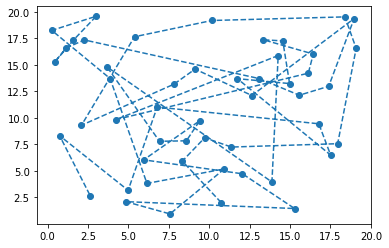

In [119]:
#Memetic EA with tournement selection
tour_memetic_solution = genetic_algorithm(N, max_iters=100, LocalSearch = True, selection="tour", tour_size = 10)

x, y = list(), list()
[x.append(coords_tsp[i][0]) for i in tour_memetic_solution]
[y.append(coords_tsp[i][1]) for i in tour_memetic_solution]
plt.plot(x, y, linestyle='dashed', marker='o')

Solution found of  [29 30 41 44 26 37 36 19 23 22 35  9 38 49 48 47 24 18 20 10  2 46 42 21
  1  3  4 17 13 39  8  0 34 27  6 32 43 40 33 31 15 14  7 45 28 12 16 11
  5 25] , best fitness is  401.97744370376853


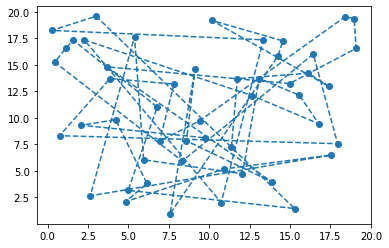

In [125]:
#Memetic EA
memetic_solution = genetic_algorithm(N, max_iters=100, LocalSearch = True, selection="-")

x, y = list(), list()
[x.append(coords_tsp[i][0]) for i in memetic_solution]
[y.append(coords_tsp[i][1]) for i in memetic_solution]
plt.plot(x, y, linestyle='dashed', marker='o')

Solution found of  [18  6  4  0 26 34 33 30 35 43 46 45 40 38 37 36 49 42 48 44 41 47 32 25
 29 24 17  9 27 39 16 12  2  3  1  7 15 28 31 20 23 14  8 10  5 11 13 19
 21 22] , best fitness is  237.9083003187316


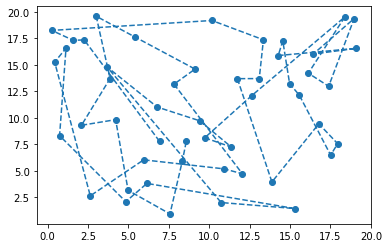

In [121]:
#Simple EA with tournement selection
tour_EA_solution = genetic_algorithm(N, max_iters=100, LocalSearch = False, selection="tour", tour_size = 10)

x, y = list(), list()
[x.append(coords_tsp[i][0]) for i in tour_EA_solution]
[y.append(coords_tsp[i][1]) for i in tour_EA_solution]
plt.plot(x, y, linestyle='dashed', marker='o')

Solution found of  [ 0  3 33 30 41 49 36 14 20 10 34 37 29 23 45 47 39 13 18 21 35 42 24 16
 25 38 48 44 43 19 40  8 46 28  1  4  9 11  2  7 12 15 31  6 22 17 32 26
  5 27] , best fitness is  385.5708222373619


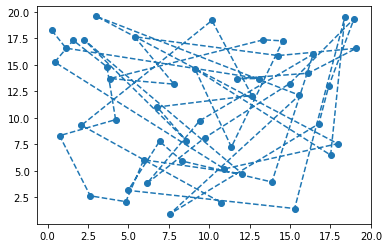

In [122]:
#Simple EA with tournement selection
EA_solution = genetic_algorithm(N, max_iters=100, LocalSearch = False, selection="-")

x, y = list(), list()
[x.append(coords_tsp[i][0]) for i in EA_solution]
[y.append(coords_tsp[i][1]) for i in EA_solution]
plt.plot(x, y, linestyle='dashed', marker='o')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a99332b8-5d3d-47fa-8230-1d208927ff84' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>